In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahironsharma","key":"df6576674585dec73061e5a2e930bb03"}'}

In [3]:
!pip install -q kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [14]:
!mkdir /content/OCT
%cd /content/OCT

mkdir: cannot create directory ‘/content/OCT’: File exists
/content/OCT


In [6]:
!kaggle datasets list -s Retinal

ref                                                           title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
andrewmvd/retinal-disease-classification                      Retinal Disease Classification                        7GB  2021-08-16 10:23:33          12990        195  0.875            
paultimothymooney/kermany2018                                 Retinal OCT Images (optical coherence tomography)    11GB  2018-03-25 15:04:56          32431        541  0.75             
gunavenkatdoddi/eye-diseases-classification                   eye_diseases_classification                         736MB  2022-08-28 09:24:24          17229        141  0.875            
sshikamaru/glaucoma-detection                                 Glaucoma

In [11]:
!kaggle datasets download paultimothymooney/kermany2018
%cd ..

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/kermany2018
License(s): CC-BY-NC-SA-4.0
100% 10.8G/10.8G [00:58<00:00, 209MB/s]
100% 10.8G/10.8G [00:59<00:00, 197MB/s]
/


In [16]:
!unzip /content/OCT/kermany2018.zip -d /content/OCT/
!rm /content/OCT/kermany2018 .zip

Streaming output truncated to the last 5000 lines.
  inflating: /content/OCT/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-2.jpeg  
  inflating: /content/OCT/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-3.jpeg  
  inflating: /content/OCT/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-1.jpeg  
  inflating: /content/OCT/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-2.jpeg  
  inflating: /content/OCT/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-3.jpeg  
  inflating: /content/OCT/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-1.jpeg  
  inflating: /content/OCT/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-2.jpeg  
  inflating: /content/OCT/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-3.jpeg  
  inflating: /content/OCT/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-4.jpeg  
  inflating: /content/OCT/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-5.jpeg  
  inflating: /content/OCT/oct2017/__MAC

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

In [19]:
#change dataset path if necessary
dataset_path = "/content/OCT/OCT2017 /train"

valid_extensions = {".jpg", ".jpeg", ".png"}

for disease in os.listdir(dataset_path):
    disease_path = os.path.join(dataset_path, disease)

    if os.path.isdir(disease_path):
        image_files = sorted(os.listdir(disease_path))

        prefix = disease[0].lower()

        for index, filename in enumerate(image_files, start=1):
            file_ext = os.path.splitext(filename)[1].lower()

            if file_ext in valid_extensions:
                new_name = f"{prefix}_{index}{file_ext}"
                old_path = os.path.join(disease_path, filename)
                new_path = os.path.join(disease_path, new_name)

                try:
                    os.rename(old_path, new_path)
                except Exception as e:
                    print(f"Error renaming {filename}: {e}")

        print(f"Renaming complete for folder: {disease}")

print("All image files renamed successfully!")

Renaming complete for folder: CNV
Renaming complete for folder: DME
Renaming complete for folder: NORMAL
Renaming complete for folder: DRUSEN
All image files renamed successfully!


In [20]:
# Define the path to the train folder
train_path = "/content/OCT/OCT2017 /train"

# Mapping of old folder names to new names
rename_mapping = {
    "CNV": "3",
    "DME": "2",
    "DRUSEN": "1",
    "NORMAL": "0"
}

# Rename the folders
for old_name, new_name in rename_mapping.items():
    old_path = os.path.join(train_path, old_name)
    new_path = os.path.join(train_path, new_name)

    if os.path.exists(old_path):
        os.rename(old_path, new_path)
        print(f"Renamed {old_name} -> {new_name}")
    else:
        print(f"Folder {old_name} not found!")

print("✅ Renaming completed!")


Renamed CNV -> 3
Renamed DME -> 2
Renamed DRUSEN -> 1
Renamed NORMAL -> 0
✅ Renaming completed!


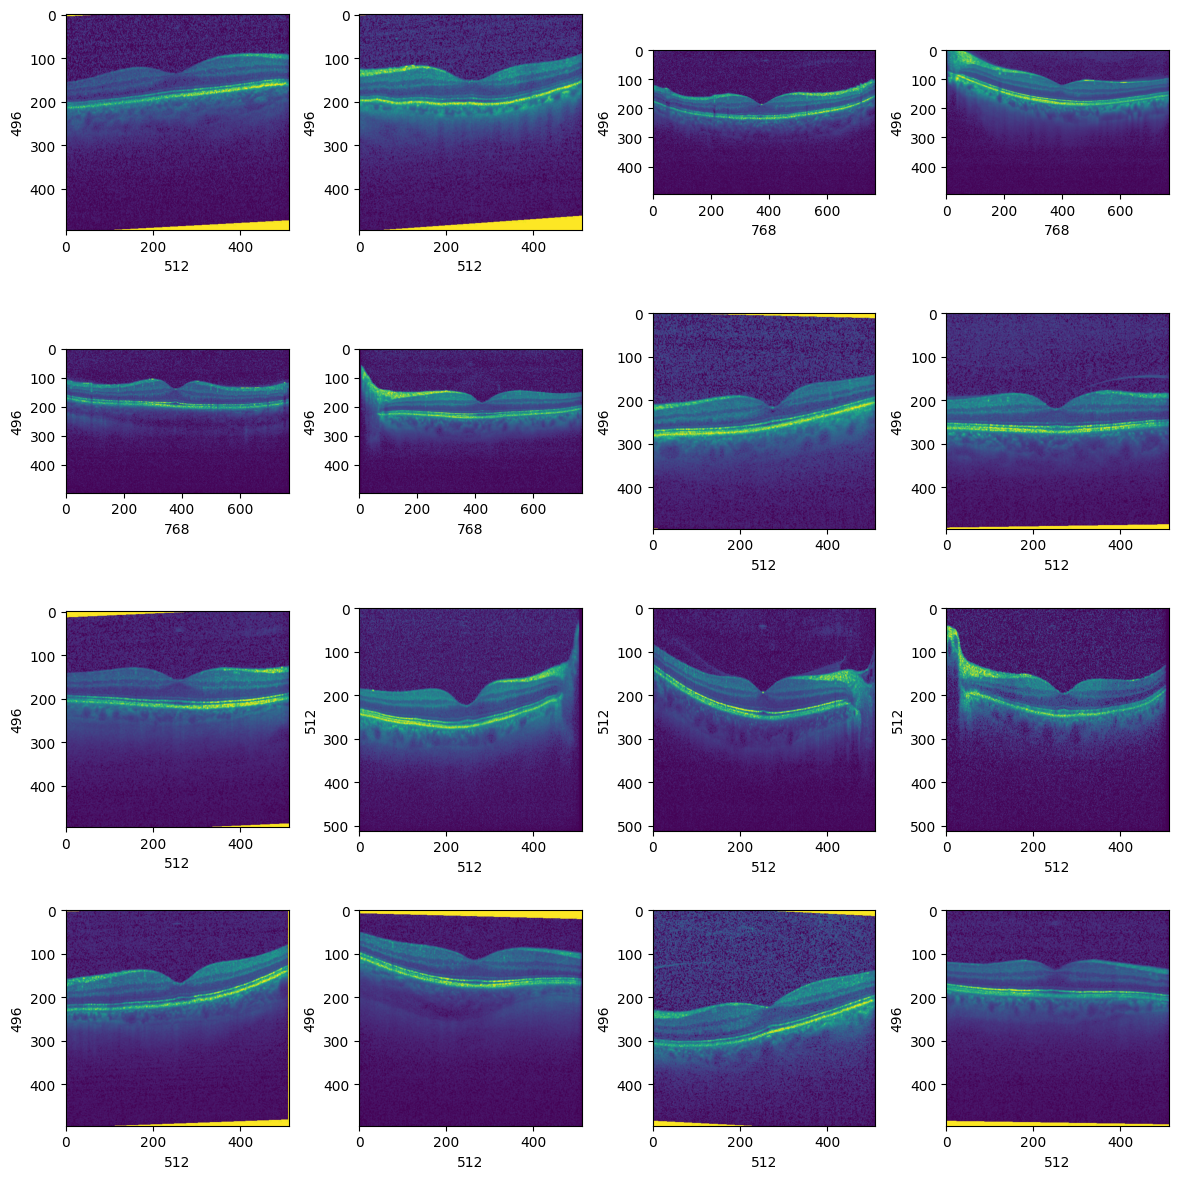

In [23]:
plt.figure(figsize=(12,12))
path = "/content/OCT/OCT2017 /train/0"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [25]:
dim1 = []
dim2 = []

for i in range(0,4):
    labels = '/content/OCT/OCT2017 /train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

function ConnectButton(){
    console.log("Working");
    document.querySelector("#connect").click()
}
setInterval(ConnectButton,60000);

In [28]:
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  498.96219634900103  Dimension 2 Mean :  682.093239423123


In [29]:
images = []
label_id = []

for i in range(0,4):
    labels = '/content/OCT/OCT2017 /train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(int(i))

In [30]:
images = np.array(images)
images = images/255

label_id = np.array(label_id)
label_id.shape

images.shape

label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

,count
0,
3,37205
0,26315
2,11348
1,8616


In [31]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [32]:
#Reshape x_train and x_val to include the channel dimension
x_train = x_train.reshape(-1, 50, 50, 1) # Reshape to (num_samples, 50, 50, 1)
x_val = x_val.reshape(-1, 50, 50, 1)   # Reshape to (num_samples, 50, 50, 1)


model = Sequential()

# Update input_shape to (50, 50, 1)
model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = (50, 50, 1), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 50, 50, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 23, 23, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         991,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,029,444 (3.93 MB)

 Trainable params: 1,029,444 (3.93 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
522/522 - 8s - 15ms/step - accuracy: 0.9112 - loss: 0.2504 - val_accuracy: 0.9089 - val_loss: 0.2521
Epoch 2/10
522/522 - 10s - 18ms/step - accuracy: 0.9096 - loss: 0.2510 - val_accuracy: 0.9190 - val_loss: 0.2298
Epoch 3/10
522/522 - 8s - 14ms/step - accuracy: 0.9125 - loss: 0.2481 - val_accuracy: 0.9157 - val_loss: 0.2383
Epoch 4/10
522/522 - 7s - 14ms/step - accuracy: 0.9116 - loss: 0.2506 - val_accuracy: 0.9077 - val_loss: 0.2630
Epoch 5/10
522/522 - 7s - 14ms/step - accuracy: 0.9131 - loss: 0.2464 - val_accuracy: 0.9171 - val_loss: 0.2364
Epoch 6/10
522/522 - 7s - 14ms/step - accuracy: 0.9125 - loss: 0.2460 - val_accuracy: 0.9286 - val_loss: 0.2061
Epoch 7/10
522/522 - 10s - 20ms/step - accuracy: 0.9129 - loss: 0.2438 - val_accuracy: 0.9196 - val_loss: 0.2235
Epoch 8/10
522/522 - 10s - 20ms/step - accuracy: 0.9119 - loss: 0.2471 - val_accuracy: 0.9157 - val_loss: 0.2397
Epoch 9/10
522/522 - 11s - 21ms/step - accuracy: 0.9152 - loss: 0.2383 - val_accuracy: 0.9155 - val_l

<Axes: >

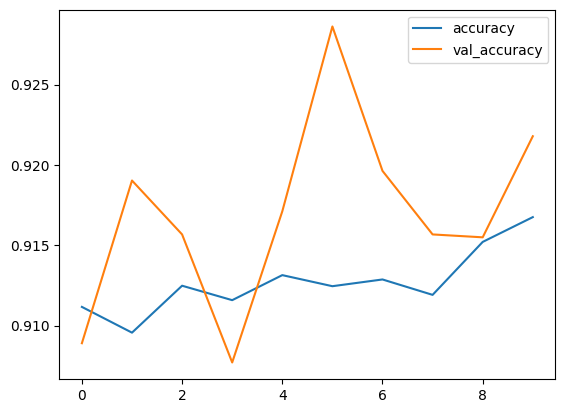

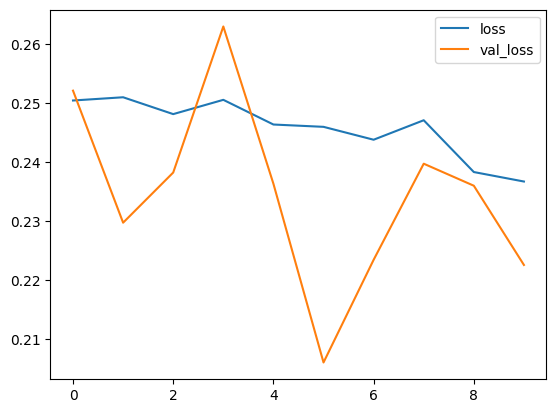

In [40]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [42]:
model.save("OCT_model.h5")
model.save("OCT_model.keras")

In [53]:
from google.colab import files
!zip -r '/content/OCT/OCT2017.zip' '/content/OCT/OCT2017 '

Streaming output truncated to the last 5000 lines.
  adding: content/OCT/OCT2017 /train/2/d_6642.jpeg (deflated 0%)
  adding: content/OCT/OCT2017 /train/2/d_8970.jpeg (deflated 0%)
  adding: content/OCT/OCT2017 /train/2/d_4849.jpeg (deflated 0%)
  adding: content/OCT/OCT2017 /train/2/d_3975.jpeg (deflated 0%)
  adding: content/OCT/OCT2017 /train/2/d_3207.jpeg (deflated 0%)
  adding: content/OCT/OCT2017 /train/2/d_7896.jpeg (deflated 0%)
  adding: content/OCT/OCT2017 /train/2/d_913.jpeg (deflated 0%)
  adding: content/OCT/OCT2017 /train/2/d_5065.jpeg (deflated 0%)
  adding: content/OCT/OCT2017 /train/2/d_5949.jpeg (deflated 0%)
  adding: content/OCT/OCT2017 /train/2/d_1792.jpeg (deflated 1%)
  adding: content/OCT/OCT2017 /train/2/d_3177.jpeg (deflated 0%)
  adding: content/OCT/OCT2017 /train/2/d_4642.jpeg (deflated 0%)
  adding: content/OCT/OCT2017 /train/2/d_6189.jpeg (deflated 0%)
  adding: content/OCT/OCT2017 /train/2/d_4251.jpeg (deflated 0%)
  adding: content/OCT/OCT2017 /train/2/d

In [44]:
files.download('/content/OCT/OCT_model.h5')
files.download('/content/OCT/OCT_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
files.download('/content/OCT/OCT2017.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
import os
import shutil

# Define the source and destination paths
source_path = "/content/OCT/OCT2017 /test"  # Path to the folder with subfolders
destination_path = "/content/OCT/OCT2017 /testing"  # Path to the destination folder

# Create the destination folder if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

# Iterate through subfolders and move files
for subfolder in os.listdir(source_path):
    subfolder_path = os.path.join(source_path, subfolder)

    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        # Iterate through files in the subfolder
        for filename in os.listdir(subfolder_path):
            source_file_path = os.path.join(subfolder_path, filename)
            destination_file_path = os.path.join(destination_path, filename)

            # Move the file
            shutil.move(source_file_path, destination_file_path)

print("✅ All files moved to the 'testing' folder.")

✅ All files moved to the 'testing' folder.


In [45]:
test_path = '/content/OCT/OCT2017 /testing'

In [46]:
#defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images

    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    images = np.array(images)

    images = images/255

    return images

In [47]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

In [48]:
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)
y_pred

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [49]:
all_lables = ['normal', 'drusen', 'diabetic macular edema', 'choroidal neovascularization']

In [50]:
import os

def count_files_until(folder_path, stop_filename):
    count = 0
    found = False

    files = sorted(os.listdir(folder_path))

    for file in files:
        if file == stop_filename:
            found = True
            break
        count += 1

    if found:
        print(f"Found '{stop_filename}' after {count} files.")
    else:
        print(f"'{stop_filename}' not found in {folder_path}.")

    return count

folder = "/content/OCT/OCT2017 /testing"  # Change this to your folder path
stop_file = "CNV-1290410-3.jpeg"  # Change this to the filename you want to stop at

count = count_files_until(folder, stop_file)
print(f"Total files before '{stop_file}': {count}")

Found 'CNV-1290410-3.jpeg' after 30 files.
Total files before 'CNV-1290410-3.jpeg': 30


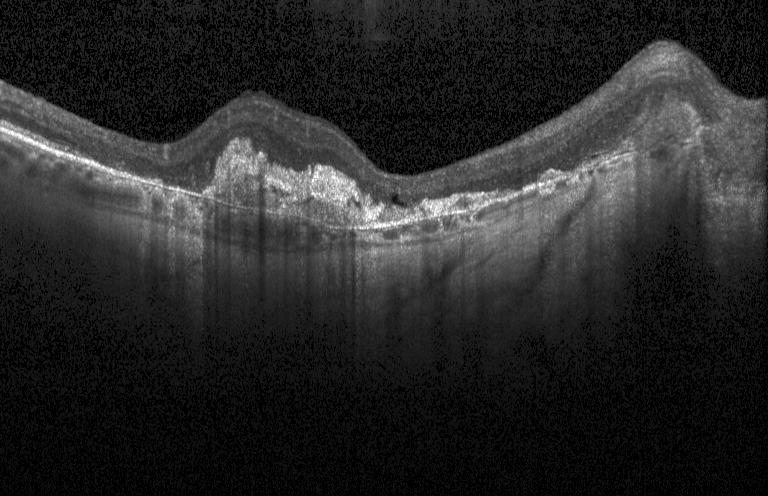

In [51]:
img = Image.open(test_path + '/CNV-1290410-3.jpeg')
img

In [52]:
print("Predicted label : ",all_lables[y_pred[count]])

Predicted label :  choroidal neovascularization
